## Mount the drive

In [ ]:
# mount the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Removing previous trained models

In [ ]:
#import os

#dir_name = '/content/drive/MyDrive/MasterThesis/CaliforniaHousingDatasetTests/GBP_explanation/deep_ensemble/saved_model/'
#test = os.listdir(dir_name)

#for item in test:
#    if item.endswith('.h5'):
#        print(f'deleting {item}')
#        os.remove(os.path.join(dir_name, item))

## Imports

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf

import os 
import random 
import math

from keras.layers import *
from keras.models import Model, Sequential
import keras.backend as K
#from keras_uncertainty.losses import regression_gaussian_nll_loss, regression_gaussian_beta_nll_loss
#from keras_uncertainty.metrics import gaussian_interval_score


tf.compat.v1.disable_eager_execution()
print(tf.__version__)
print(tf.executing_eagerly())

2.8.0
False


## Regression gaussian nll loss

In [ ]:
def regression_gaussian_nll_loss(variance_tensor, epsilon=1e-8, variance_logits=False):
    """
        Gaussian negative log-likelihood for regression, with variance estimated by the model.
        This function returns a keras regression loss, given a symbolic tensor for the sigma square output of the model.
        The training model should return the mean, while the testing/prediction model should return the mean and variance.
    """
    def nll(y_true, y_pred):
        #if variance_logits:
        #    variance_tensor = K.exp(variance_tensor)

        return 0.5 * K.mean(K.log(variance_tensor + epsilon) + K.square(y_true - y_pred) / (variance_tensor + epsilon))

    return nll

## Load data

In [ ]:
# load the california housing data from csv
train_file = '/content/sample_data/california_housing_train.csv'
test_file = '/content/sample_data/california_housing_test.csv'

train_combined = pd.read_csv(train_file)
test = pd.read_csv(test_file)

# split the data in validation and test (from test.csv)
train, val = train_test_split(train_combined, test_size=0.25)

feature_names = list(train_combined.columns)
print(feature_names)

# assign the target variable
target = 'median_house_value'

# extract the target label in all sets
train_labels_df= train[target]
val_labels_df = val[target]
test_labels_df = test[target]

# extract the data from all sets 
train_data_df = train.drop(columns=target, axis=1)
val_data_df = val.drop(columns=target, axis=1)
test_data_df = test.drop(columns=target, axis=1)

train_data_unnormalized = train_data_df.to_numpy()
train_labels_unnormalized = train_labels_df.to_numpy()

val_data_unnormalized = val_data_df.to_numpy()
val_labels_unnormalized = val_labels_df.to_numpy()

test_data_unnormalized = test_data_df.to_numpy()
test_labels_unnormalized = test_labels_df.to_numpy()

# normalize the data using minmax 
minmax = MinMaxScaler() 

train_data = minmax.fit_transform(train_data_unnormalized)
train_label_temp = np.expand_dims(train_labels_unnormalized, axis=1)
train_labels = minmax.fit_transform(train_label_temp)

val_data = minmax.fit_transform(val_data_unnormalized)
val_label_temp = np.expand_dims(val_labels_unnormalized, axis=1)
val_labels = minmax.fit_transform(val_label_temp)

test_data = minmax.fit_transform(test_data_unnormalized)
test_label_temp = np.expand_dims(test_labels_unnormalized, axis=1)
test_labels = minmax.fit_transform(test_label_temp)


print('Training data shape \n', train_data.shape)
print('Training labels shape \n', train_labels.shape)
#print('Training data \n ', train_data)
#print('Training labels \n ', train_labels)

print('Validation data shape \n ',val_data.shape)
print('Validation labels shape \n ', val_labels.shape)
#print('Validation data \n ', val_data)
#print('Validation labels \n ', val_labels)

print('Test data shape \n ', test_data.shape)
print('Test labels shape \n ', test_labels.shape)
#print('Test data \n ', test_data)
#print('Test labels \n ', test_labels)# load the california housing data from csv

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
Training data shape 
 (12750, 8)
Training labels shape 
 (12750, 1)
Validation data shape 
  (4250, 8)
Validation labels shape 
  (4250, 1)
Test data shape 
  (3000, 8)
Test labels shape 
  (3000, 1)


In [ ]:
epochs = 2 
num_estimators = 2 

if os.path.isdir('/content/drive/MyDrive/MasterThesis/CaliforniaHousingDatasetTests/GBP_explanation/deep_ensemble/saved_model/'):
    pass    
else:
    os.mkdir('/content/drive/MyDrive/MasterThesis/CaliforniaHousingDatasetTests/GBP_explanation/deep_ensemble/saved_model/')
save_model_path = '/content/drive/MyDrive/MasterThesis/CaliforniaHousingDatasetTests/GBP_explanation/deep_ensemble/saved_model/'

## Define Ensemble model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________
Train on 12750 samples, validate on 4250 samples
Epoch 1/2
12750/12750 - 1s - loss: -9.5398e-01 - mae: 0.1485 - val_loss: -1.3478e+00 - val_mae: 0.1120 - 1s/epoch - 79us/sample
Epoch 2/2


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


12750/12750 - 1s - loss: -1.3759e+00 - mae: 0.1082 - val_loss: -1.3941e+00 - val_mae: 0.1033 - 772ms/epoch - 61us/sample


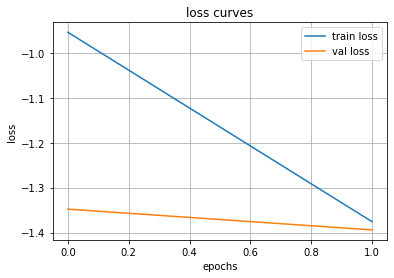

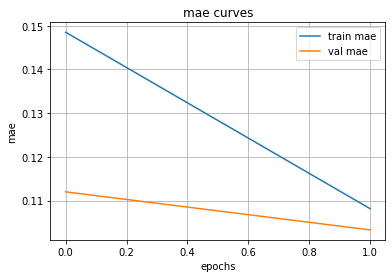

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected 

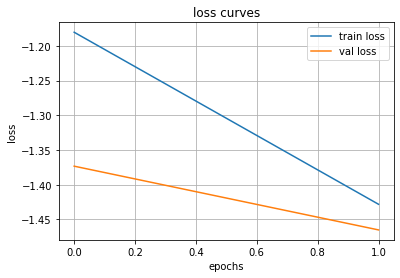

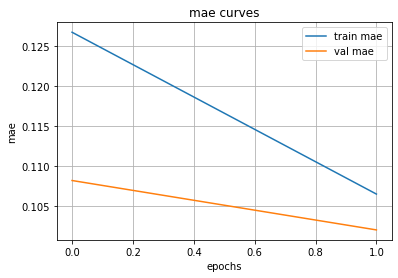

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_4 (Dense)             (None, 32)                288       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connecte

In [ ]:
#obtained from hyperparameter optimization
def ensemble_function(num_estimators, x_train, y_train, x_val, y_val, x_test, y_test, epochs):
    for i in range(num_estimators):
        inp = Input(shape=(8,))
        x = Dense(32, activation='relu')(inp)
        x = Dense(32, activation='relu')(x)
        mean = Dense(1, activation='linear')(x)
        var = Dense(1, activation='softplus')(x)

        train_model = Model(inp, mean)
        pred_model = Model(inp, [mean, var])
        train_model.compile(loss=regression_gaussian_nll_loss(var), optimizer='adam', metrics=['mae'])

        train_model.summary()
        
        history = train_model.fit(x_train, y_train, validation_data=(x_val, y_val), verbose=2, epochs=epochs)

        # plotting the training and validation curves
        plt.plot(history.history['loss'], label='train loss')
        plt.plot(history.history['val_loss'], label='val loss')
        plt.legend()
        plt.grid()
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.title('loss curves')
        plt.show()

        plt.plot(history.history['mae'], label='train mae')
        plt.plot(history.history['val_mae'], label='val mae')
        plt.legend()
        plt.grid()
        plt.xlabel('epochs')
        plt.ylabel('mae')
        plt.title('mae curves')
        plt.show()

        train_model.save(save_model_path+'ensemble_id_'+str(i)+'.h5')

        train_model.summary()
        pred_model.summary()

        test_input = x_test[0]
        test_input = np.expand_dims(test_input, axis=0)
        mean, var = pred_model(test_input)
        print(mean)
        print(var)


ensemble_function(num_estimators, train_data, train_labels, val_data, val_labels, test_data, test_labels, epochs)
